In [2]:
#Typical libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Real-time data from https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data
#Uploading the data from start date(5/7/2014 made public) to 11/16/18
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')
df = df.drop(df[pd.to_numeric(df['ZIP CODE'], errors ='coerce').isna()].index) #taking out rows without zip code input

#Categorizing by zip code; latitude, longitude, location is not needed)
df = df.drop(columns=['LATITUDE', 'LONGITUDE', 'LOCATION']) 
#unique key is also not needed...just a randomly generated key
df = df.drop(columns=['UNIQUE KEY']) 
df.head(20)

C:\Users\Maggie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/16/2018,0:10:00,MANHATTAN,10010,5 AVENUE,BROADWAY,NaN,0,0,0,...,Unspecified,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,11/16/2018,0:45:00,BROOKLYN,11211,BORINQUEN PLACE,HAVEMEYER STREET,NaN,4,0,0,...,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,Taxi,Taxi,NaN,NaN,NaN
3,11/16/2018,1:00:00,BRONX,10454,EAST 137 STREET,WILLOW AVENUE,NaN,0,0,0,...,Pavement Slippery,Unspecified,NaN,NaN,NaN,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,11/16/2018,1:00:00,BROOKLYN,11221,WILSON AVENUE,PALMETTO STREET,NaN,0,0,0,...,Pavement Slippery,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,11/16/2018,2:50:00,BRONX,10451,EAST 149 STREET,GERARD AVENUE,NaN,0,0,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Taxi,Taxi,NaN,NaN,NaN
9,11/16/2018,5:30:00,QUEENS,11417,ROCKAWAY BOULEVARD,CENTREVILLE AVENUE,NaN,1,0,1,...,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11/16/2018,5:45:00,MANHATTAN,10128,EAST 88 STREET,2 AVENUE,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
12,11/16/2018,6:02:00,BROOKLYN,11206,NaN,NaN,787 BROADWAY,0,0,0,...,Following Too Closely,Driver Inattention/Distraction,NaN,NaN,NaN,Garbage or Refuse,Sedan,NaN,NaN,NaN
13,11/16/2018,6:10:00,MANHATTAN,10128,EAST 92 STREET,2 AVENUE,NaN,0,0,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
14,11/15/2018,0:00:00,BROOKLYN,11228,NaN,NaN,1421 71 STREET,0,0,0,...,Failure to Yield Right-of-Way,Alcohol Involvement,Unspecified,NaN,NaN,Sedan,Sedan,Sedan,NaN,NaN


num samples = 720004, num attributes = 25


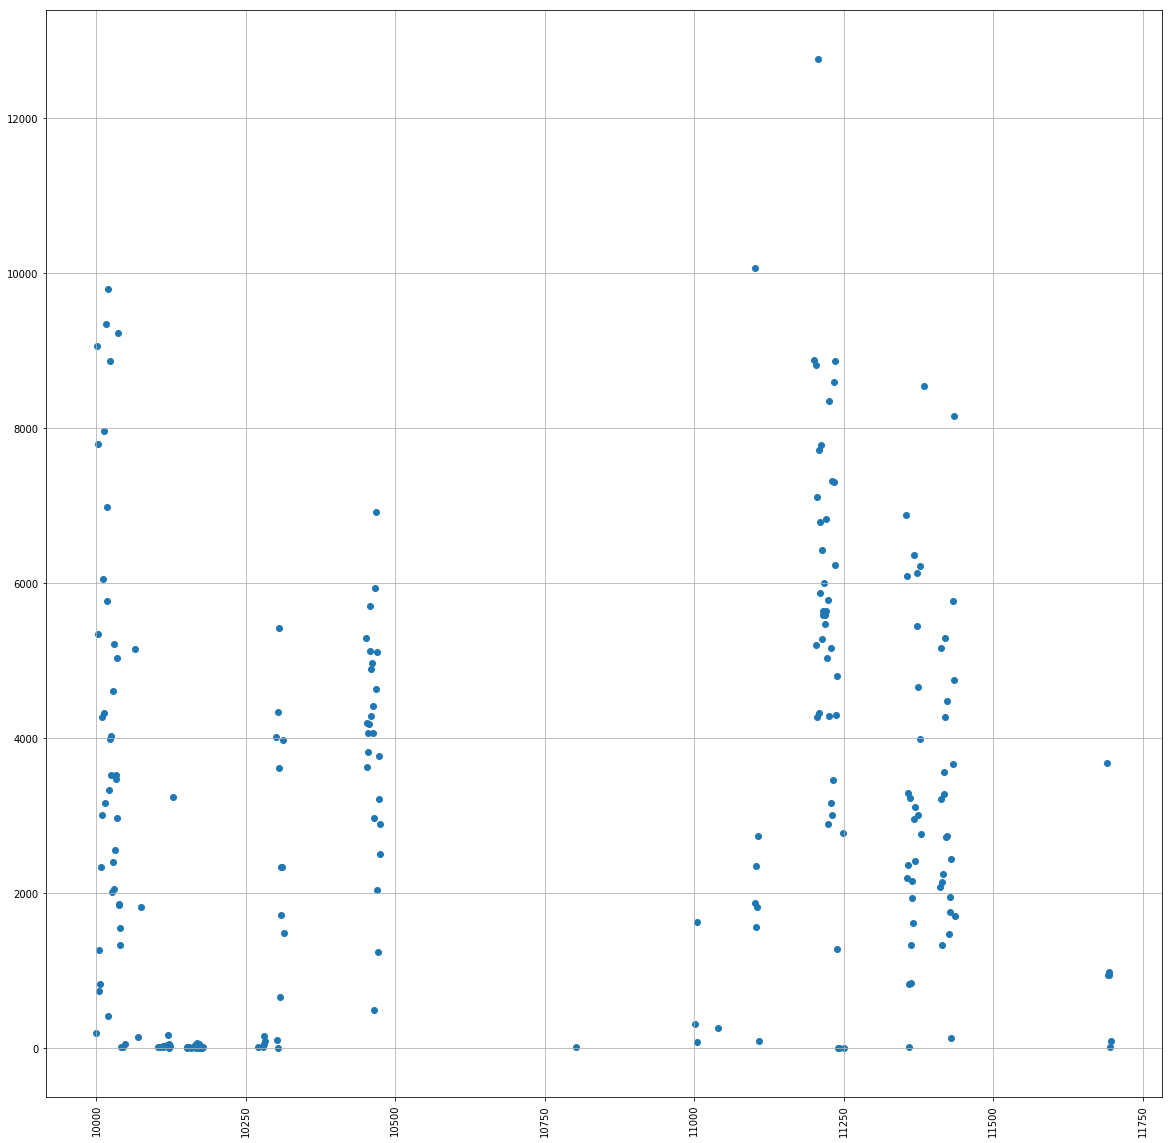

In [3]:
nsamp, natt = df.shape
print('num samples = {0:d}, num attributes = {1:d}'.format(nsamp,natt))

#General visualization of zip codes
x_unfiltered = np.array(df['ZIP CODE'])
#print(x_unfiltered[0:10])
x_unfiltered = pd.Series(x_unfiltered)
#print(x_unfiltered[0:10])
#x_unfiltered = pd.to_numeric(x_unfiltered, errors = 'coerce').dropna()
zipcode = x_unfiltered.astype(int) #casting to integer from float
#nsamp2 = zipcode.shape
#print('num samples = {0:d}' .format(nsamp2[0]))
#print(zipcode[0:10])

#number of accidents per zip code
naccidents = pd.Series(zipcode).value_counts().tolist()
#print(pd.Series(zipcode).value_counts())

plt.figure(figsize=(20,20))
plt.scatter(pd.Series(zipcode).value_counts().index.tolist(), pd.Series(zipcode).value_counts())
plt.xticks(rotation = 90)
plt.grid()

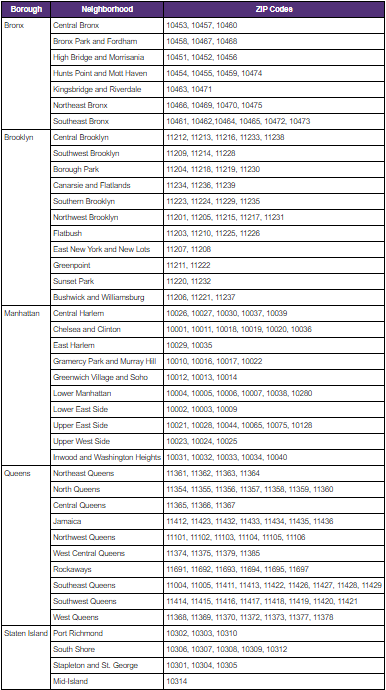

In [32]:
from sklearn import linear_model, preprocessing

# Make binary array on whether there were casualties or not at an accident
cas_data = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]
cas_data = cas_data.replace('NaN', 0)
#print(cas_data[0:20])
cas_final = np.sum(cas_data, axis=1)
#print(cas_final[0:20])
cas_final[cas_final > 0] = 1
#print(cas_final[0:20])

# Get array of zipcodes in same order
zip_data = df[['ZIP CODE']]
#print(zip_data[0:20])

# Create logistic Regression object and Fit Training Data - Casualties vs Zipcode
logreg = linear_model.LogisticRegression(C = 1e5)
logreg.fit(zip_data[0:100], cas_final[0:100]) # Use 100 values to determine classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Accuracy is 0.838000


Text(0,0.5,'Casualties')

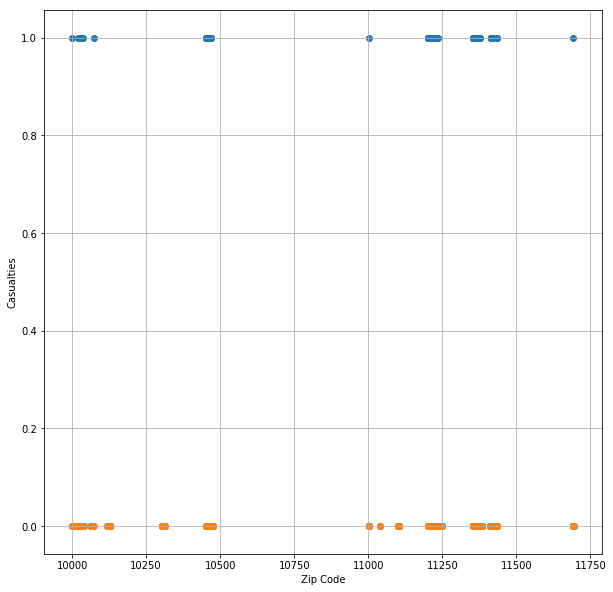

In [57]:
# Test accuracy of the classifier created
from sklearn import metrics

cas_final_hat = logreg.predict(zip_data[0:500])
cas_final_prob = logreg.predict_proba(zip_data[0:500])
acc = np.mean(cas_final_hat == cas_final[0:500])
print('Accuracy is {0:f}' .format(acc))

# Graph
plt.figure(figsize=(10,10))
plt.scatter(zip_data[0:500], cas_final[0:500])
plt.scatter(zip_data[0:500], cas_final_hat)
plt.grid()
plt.xlabel('Zip Code')
plt.ylabel('Casualties')

In [75]:
from datetime import datetime, timedelta

time_data = df['DATE'] + ' ' + df['TIME']
#print(time_data[0:20])

time_Data = pd.to_datetime(time_data)
#print(time_Data[0:20])

time_DATA = pd.Series(time_Data).dt.round('H')
#print(time_DATA[0:20])

tIME, dATE = time_DATA.apply(lambda x:x.time()), time_DATA.apply(lambda x:x.date())
print(tIME[0:20])

time_final = tIME.apply(lambda x:x.strftime('%H%M%S'))
print(time_final[0:20])



0     00:00:00
2     01:00:00
3     01:00:00
4     01:00:00
7     03:00:00
9     06:00:00
10    06:00:00
12    06:00:00
13    06:00:00
14    00:00:00
15    00:00:00
16    00:00:00
17    00:00:00
21    00:00:00
22    00:00:00
25    10:00:00
26    10:00:00
28    10:00:00
29    10:00:00
30    10:00:00
dtype: object
0     000000
2     010000
3     010000
4     010000
7     030000
9     060000
10    060000
12    060000
13    060000
14    000000
15    000000
16    000000
17    000000
21    000000
22    000000
25    100000
26    100000
28    100000
29    100000
30    100000
dtype: object


In [135]:
time_final2 = np.row_stack(time_final)
#print(time_final2[0:20])
list_stuff = time_final2[0::]
list_final = []
for i in range(len(list_stuff)-1):
    list_final.append(int(list_stuff[i])/10000)
    
time_array = np.asarray(list_final)
time_array2 = time_array.reshape(-1, 1)
print(time_array2)

#print(list_final[0:20])

[[ 0.]
 [ 1.]
 [ 1.]
 ...
 [17.]
 [17.]
 [17.]]


In [140]:
from sklearn import linear_model, preprocessing

# Create logistic Regression object and Fit Training Data - Casualties vs Time of Accident
logreg2 = linear_model.LogisticRegression(C = 1e5)
logreg2.fit(time_array2[0:100], (cas_final[0:100]))# Use 100 values to determine classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Accuracy is 0.838000


Text(0,0.5,'Casualties')

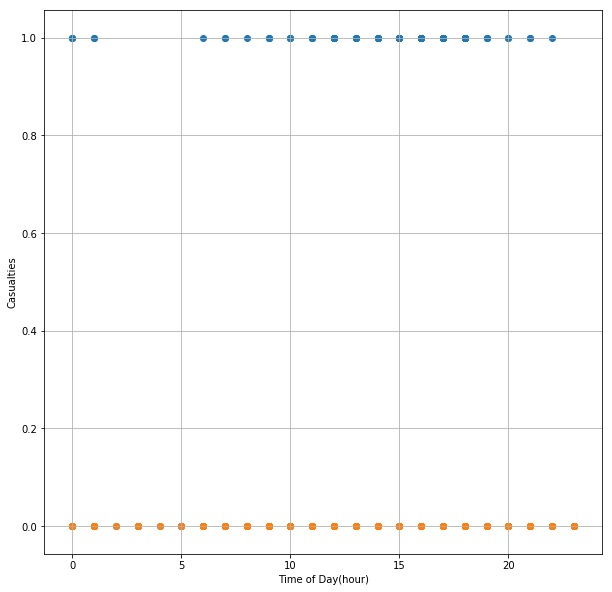

In [149]:
# Test accuracy of the classifier created
from sklearn import metrics

cas_final_hat2 = logreg2.predict(time_array2[0:500])
#cas_final_prob2 = logreg2.predict_proba(time_array2[0:500])
acc2 = np.mean(cas_final_hat2 == cas_final[0:500])
print('Accuracy is {0:f}' .format(acc2))

# Graph
plt.figure(figsize = (10,10))
plt.scatter(time_array2[0:500], cas_final[0:500])
plt.scatter(time_array2[0:500], cas_final_hat2[0:500])
plt.grid()
plt.xlabel('Time of Day(hour)')
plt.ylabel('Casualties')

Accuracy is 0.838000


Text(0,0.5,'Casualties')

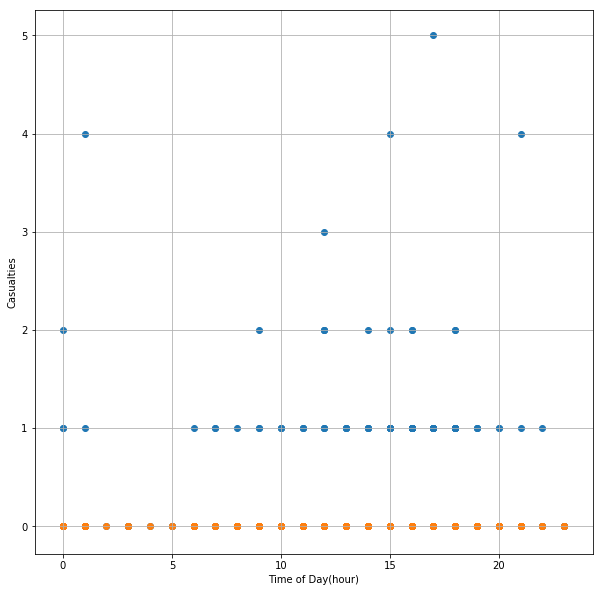

In [150]:
#Without binary class
casualties = np.sum(cas_data, axis=1)

# Create logistic Regression object and Fit Training Data - Casualties vs Time of Accident
logreg3 = linear_model.LogisticRegression(C = 1e5)
logreg3.fit(time_array2[0:100], (casualties[0:100]))# Use 100 values to determine classifier
cas_final_hat3 = logreg3.predict(time_array2[0:500])

#cas_final_prob2 = logreg2.predict_proba(time_array2[0:500])
acc3 = np.mean(cas_final_hat3 == casualties[0:500])
print('Accuracy is {0:f}' .format(acc3))

# Graph
plt.figure(figsize = (10,10))
plt.scatter(time_array2[0:500], casualties[0:500])
plt.scatter(time_array2[0:500], cas_final_hat3[0:500])
plt.grid()
plt.xlabel('Time of Day(hour)')
plt.ylabel('Casualties')

In [ ]:
#Extra
#datas = df.values[:, 7:8]
#causalties = datas.sum(axis=1)
#print(causalties[0:20])

# from sklearn import linear_model

# #Number of vehicles involved = # of entries filled in columns vehicle type code 1-5 for said accident 
# data = df.values[:, 20:25]
# #print(data[0:10, :])
# data2 = pd.DataFrame(data)
# vehicle_involved = data2.notnull().sum(axis=1)
# #print(vehicle_involved[0:20])
# veh_inv = vehicle_involved.as_matrix()
# print(veh_inv[0:20])

# #Fitting the model
# zip_train = zipcode[0:100]
# veh_train = veh_inv[0:100]
# veh_train = veh_train.reshape(-1,1)
# cas_train = causalties[0:100]
# #cas_train = cas_train.reshape(-1,1)

# regr = linear_model.LinearRegression()

# regr.fit(veh_train, cas_train)

# cas_predict = regr.predict(veh_train[0:100])
# plt.scatter(veh_train[0:100], cas_train[0:100])
# plt.plot(veh_train[0:100], cas_predict[0:100])